In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.optimize import minimize_scalar

%matplotlib inline

def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

def weight_category(weight):
    if weight <120:
        result = 1
    elif weight >=150:
        result = 3
    else:
        result = 2
    
    return result
            

df = pd.read_csv('heights_weights.csv', index_col='Index')

df['BMI'] = df.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

–í–µ—Ä–Ω–æ –ª–∏ –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∞ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ä–æ—Å—Ç–∞ –∏–∑ –ø. 2? (3 –±–∞–ª–ª–∞). –ü—Ä–∞–≤–∏–ª—å–Ω–æ –ª–∏ –æ—Ñ–æ—Ä–º–ª–µ–Ω—ã –ø–æ–¥–ø–∏—Å–∏? (1 –±–∞–ª–ª)

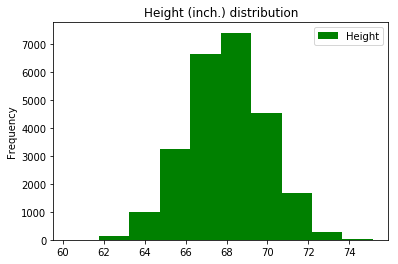

In [2]:
df.plot(y='Height', kind='hist', 
           color='green',  title='Height (inch.) distribution')

–í–µ—Ä–Ω–æ –ª–∏ –æ—Ç–æ–±—Ä–∞–∂–µ–Ω—ã –ø–æ–ø–∞—Ä–Ω—ã–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏–∑ –ø. 3? (3 –±–∞–ª–ª–∞). –ü—Ä–∞–≤–∏–ª—å–Ω–æ –ª–∏ –æ—Ñ–æ—Ä–º–ª–µ–Ω—ã –ø–æ–¥–ø–∏—Å–∏? (1 –±–∞–ª–ª)

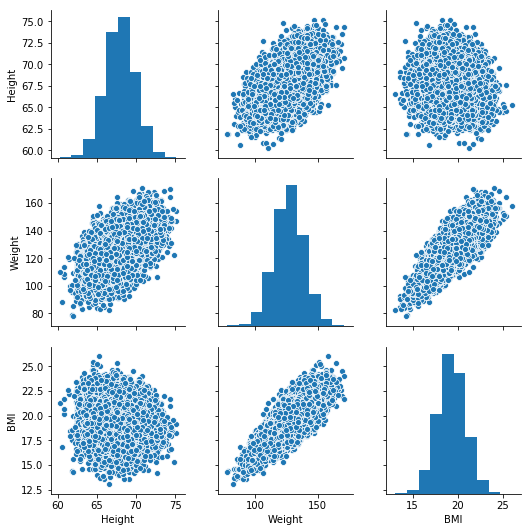

In [3]:
sns.pairplot(df)

–°–æ–∑–¥–∞–π—Ç–µ –≤ DataFrame data –Ω–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫ weight_category, –∫–æ—Ç–æ—Ä—ã–π –±—É–¥–µ—Ç –∏–º–µ—Ç—å 3 –∑–Ω–∞—á–µ–Ω–∏—è:
    1 ‚Äì –µ—Å–ª–∏ –≤–µ—Å –º–µ–Ω—å—à–µ 120 —Ñ—É–Ω—Ç–æ–≤. (~ 54 –∫–≥.), 
    3 - –µ—Å–ª–∏ –≤–µ—Å –±–æ–ª—å—à–µ –∏–ª–∏ —Ä–∞–≤–µ–Ω 150 —Ñ—É–Ω—Ç–æ–≤ (~68 –∫–≥.),
    2 ‚Äì –≤ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö —Å–ª—É—á–∞—è—Ö. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ ¬´—è—â–∏–∫ —Å —É—Å–∞–º–∏¬ª (boxplot),
    –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É—é—â–∏–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ä–æ—Å—Ç–∞ –æ—Ç –≤–µ—Å–æ–≤–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏.
    –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –º–µ—Ç–æ–¥ boxplot –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ Seaborn –∏ –º–µ—Ç–æ–¥ apply Pandas DataFrame.
    –ü–æ–¥–ø–∏—à–∏—Ç–µ –æ—Å—å y* –º–µ—Ç–∫–æ–π ¬´–†–æ—Å—Ç¬ª, –æ—Å—å *x ‚Äì –º–µ—Ç–∫–æ–π ¬´–í–µ—Å–æ–≤–∞—è –∫–∞—Ç–µ–≥–æ—Ä–∏—è¬ª. –í–µ—Ä–Ω–æ –ª–∏ –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∞ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ä–æ—Å—Ç–∞ –æ—Ç –≤–µ—Å–æ–≤–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –∏–∑ –ø. 4? (3 –±–∞–ª–ª–∞). –ü—Ä–∞–≤–∏–ª—å–Ω–æ –ª–∏ –æ—Ñ–æ—Ä–º–ª–µ–Ω—ã –ø–æ–¥–ø–∏—Å–∏? (1 –±–∞–ª–ª)

[Text(0, 0.5, '–†–æ—Å—Ç'), Text(0.5, 0, '–í–µ—Å–æ–≤–∞—è –∫–∞—Ç–µ–≥–æ—Ä–∏—è')]

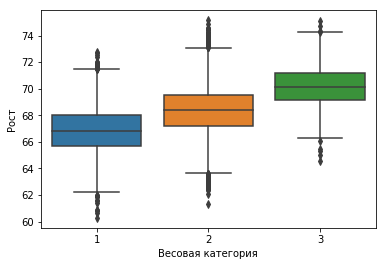

In [4]:
df['weight_cat'] = df['Weight'].apply(weight_category)
sns.boxplot(x = df['weight_cat'],y=df['Height'],).set(xlabel = '–í–µ—Å–æ–≤–∞—è –∫–∞—Ç–µ–≥–æ—Ä–∏—è',ylabel = '–†–æ—Å—Ç')

[5]. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ scatter plot –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —Ä–æ—Å—Ç–∞ –æ—Ç –≤–µ—Å–∞, –∏—Å–ø–æ–ª—å–∑—É—è –º–µ—Ç–æ–¥ plot –¥–ª—è
Pandas DataFrame —Å –∞—Ä–≥—É–º–µ–Ω—Ç–æ–º kind='scatter'. –ü–æ–¥–ø–∏—à–∏—Ç–µ –∫–∞—Ä—Ç–∏–Ω–∫—É.

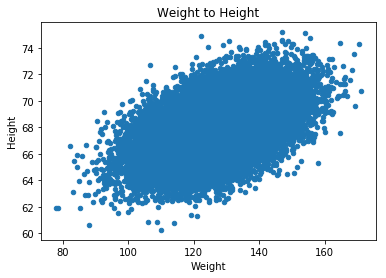

In [5]:
df.plot(x = 'Weight', y = 'Height',kind = 'scatter', title = 'Weight to Height')

**[6].** –ù–∞–ø–∏—à–∏—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é, –∫–æ—Ç–æ—Ä–∞—è –ø–æ –¥–≤—É–º –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º $w_0$ –∏ $w_1$ –≤—ã—á–∏—Å–ª—è–µ—Ç –∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω—É—é –æ—à–∏–±–∫—É –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —Ä–æ—Å—Ç–∞ $y$ –æ—Ç –≤–µ—Å–∞ $x$ –ø—Ä—è–º–æ–π –ª–∏–Ω–∏–µ–π $y = w_0 + w_1 * x$:
$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
–ó–¥–µ—Å—å $n$ ‚Äì —á–∏—Å–ª–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –≤ –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö, $y_i$ –∏ $x_i$ ‚Äì —Ä–æ—Å—Ç –∏ –≤–µ—Å $i$-–æ–≥–æ —á–µ–ª–æ–≤–µ–∫–∞ –≤ –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö. 

In [59]:
def error(w0,w1,x,y):
    n = range(len(x))
    
    total_error = 0
    for row in n:
        cur_error = (y.iloc[row]-(w0+w1*x.iloc[row]))**2
        total_error+=cur_error
    return total_error




[7]. –ü—Ä–æ–≤–µ–¥–∏—Ç–µ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ –∏–∑ –ø. 5 –ó–∞–¥–∞–Ω–∏—è 1 –¥–≤–µ –ø—Ä—è–º—ã–µ, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è–º –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ ( ùë§0,ùë§1)=(60,0.05)
–∏ ( ùë§0,ùë§1)=(50,0.16) . –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –º–µ—Ç–æ–¥ plot –∏–∑ matplotlib.pyplot, –∞ —Ç–∞–∫–∂–µ –º–µ—Ç–æ–¥ linspace –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ NumPy. 
–ü–æ–¥–ø–∏—à–∏—Ç–µ –æ—Å–∏ –∏ –≥—Ä–∞—Ñ–∏–∫.


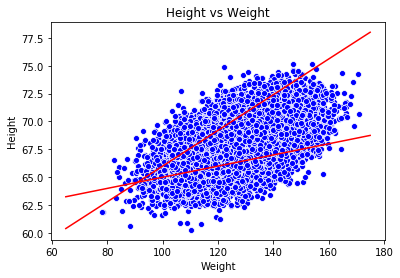

In [60]:
fig, ax = plt.subplots()
sns.scatterplot(x = df['Weight'], y = df['Height'],  ax=ax, color='b').set_title('Height vs Weight')
x1 = np.linspace(65,175,200)
y1 = 60+x1*0.05

ax.plot(x1, y1, color='r')

x2 = np.linspace(65,175,200)
y2 = 50+x1*0.16

ax.plot(x2, y2, color='r')

[8]. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥—Ä–∞—Ñ–∏–∫ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —Ñ—É–Ω–∫—Ü–∏–∏ –æ—à–∏–±–∫–∏, –ø–æ—Å—á–∏—Ç–∞–Ω–Ω–æ–π –≤ –ø. 6, –æ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä–∞  ùë§1  –ø—Ä–∏  ùë§0  = 50. –ü–æ–¥–ø–∏—à–∏—Ç–µ –æ—Å–∏ –∏ –≥—Ä–∞—Ñ–∏–∫.

[Text(0, 0.5, 'Error'),
 Text(0.5, 0, 'Slope'),
 Text(0.5, 1.0, 'Error function')]

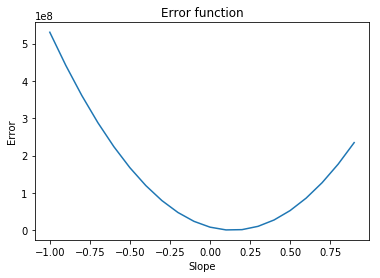

In [61]:

w0=50
w1_range = np.arange(-1, 1, 0.1)

y = [error(w0,w1,df['Weight'],df['Height']) for w1 in w1_range]
sns.lineplot(x=  w1_range,y=y).set(xlabel = 'Slope',ylabel = 'Error',title = 'Error function')


[9]. –° –ø–æ–º–æ—â—å—é –º–µ—Ç–æ–¥–∞ minimize_scalar –∏–∑ scipy.optimize –Ω–∞–π–¥–∏—Ç–µ –º–∏–Ω–∏–º—É–º —Ñ—É–Ω–∫—Ü–∏–∏, –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ–π –≤ –ø. 6, –¥–ª—è –∑–Ω–∞—á–µ–Ω–∏–π –ø–∞—Ä–∞–º–µ—Ç—Ä–∞  ùë§1  –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ [-5,5]. –ü—Ä–æ–≤–µ–¥–∏—Ç–µ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ –∏–∑ –ø. 5 –ó–∞–¥–∞–Ω–∏—è 1 –ø—Ä—è–º—É—é, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â—É—é –∑–Ω–∞—á–µ–Ω–∏—è–º –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ ( ùë§0 ,  ùë§1 ) = (50,  ùë§1_ùëúùëùùë° ), –≥–¥–µ  ùë§1_ùëúùëùùë°  ‚Äì –Ω–∞–π–¥–µ–Ω–Ω–æ–µ –≤ –ø. 8 –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞  ùë§1 .

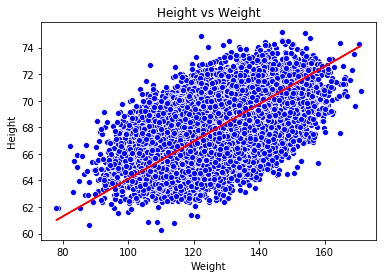

In [62]:
def error_w1(w1):
    
    x = df['Weight']
    y = df['Height']
    w0=50
    n = range(len(x))
    
    total_error = 0
    for row in n:
        cur_error = (y.iloc[row]-(w0+w1*x.iloc[row]))**2
        total_error+=cur_error
    return total_error

res=minimize_scalar(error_w1, bounds=(-5,5), method='bounded')

fig, ax = plt.subplots()
sns.scatterplot(x = df['Weight'], y = df['Height'],  ax=ax, color='b').set_title('Height vs Weight')
x1 = df['Weight']
y1 = 50+x*res.x

ax.plot(x1, y1, color='r')


[10]. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ 3D-–≥—Ä–∞—Ñ–∏–∫ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —Ñ—É–Ω–∫—Ü–∏–∏ –æ—à–∏–±–∫–∏, –ø–æ—Å—á–∏—Ç–∞–Ω–Ω–æ–π –≤ –ø.6 –æ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤  ùë§0  –∏  ùë§1 . –ü–æ–¥–ø–∏—à–∏—Ç–µ –æ—Å—å  ùë•  –º–µ—Ç–∫–æ–π ¬´Intercept¬ª, –æ—Å—å  ùë¶  ‚Äì –º–µ—Ç–∫–æ–π ¬´Slope¬ª, a –æ—Å—å  ùëß  ‚Äì –º–µ—Ç–∫–æ–π ¬´Error¬ª.

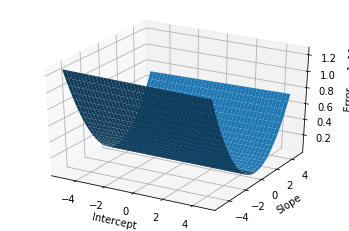

In [63]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


X, Y = np.meshgrid(np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25))
Z  = error(X,Y,df['Weight'],df['Height'])
#Z = np.sin(np.sqrt(X**2 + Y**2))

ax.plot_surface(X, Y, Z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()



[11]. –° –ø–æ–º–æ—â—å—é –º–µ—Ç–æ–¥–∞ minimize –∏–∑ scipy.optimize –Ω–∞–π–¥–∏—Ç–µ –º–∏–Ω–∏–º—É–º —Ñ—É–Ω–∫—Ü–∏–∏, –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ–π –≤ –ø. 6, –¥–ª—è –∑–Ω–∞—á–µ–Ω–∏–π –ø–∞—Ä–∞–º–µ—Ç—Ä–∞  ùë§0  –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ [-100,100] –∏  ùë§1  - –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ [-5, 5]. –ù–∞—á–∞–ª—å–Ω–∞—è —Ç–æ—á–∫–∞ ‚Äì ( ùë§0 ,  ùë§1 ) = (0, 0). –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –º–µ—Ç–æ–¥ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ L-BFGS-B (–∞—Ä–≥—É–º–µ–Ω—Ç method –º–µ—Ç–æ–¥–∞ minimize). –ü—Ä–æ–≤–µ–¥–∏—Ç–µ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ –∏–∑ –ø. 5 –ó–∞–¥–∞–Ω–∏—è 1 –ø—Ä—è–º—É—é, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â—É—é –Ω–∞–π–¥–µ–Ω–Ω—ã–º –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏—è–º –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤  ùë§0  –∏  ùë§1 . –ü–æ–¥–ø–∏—à–∏—Ç–µ –æ—Å–∏ –∏ –≥—Ä–∞—Ñ–∏–∫.

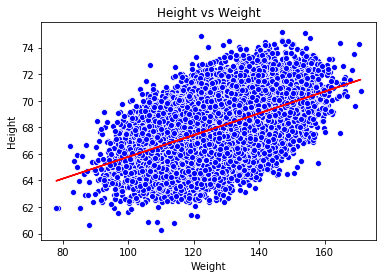

In [77]:
def error_w0_w1(ws):
    
    x = df['Weight']
    y = df['Height']
    
    n = range(len(x))
    
    total_error = 0
    for row in n:
        cur_error = (y.iloc[row]-(ws[0]+ws[1]*x.iloc[row]))**2
        total_error+=cur_error
    return total_error

res=scipy.optimize.minimize(error_w0_w1, (0,0),  bounds=((-100,100),(-5, 5)),method = 'L-BFGS-B')

fig, ax = plt.subplots()
sns.scatterplot(x = df['Weight'], y = df['Height'],  ax=ax, color='b').set_title('Height vs Weight')
x1 = df['Weight']
y1 = res.x[0]+x*res.x[1]

ax.plot(x1, y1, color='r')

array([57.57171454,  0.08200697])